# Dlib Tutorial

Hey guys! Today we're going to use dlib to help you with some handy-dandy face recognition. What is dlib? Dlib is a numerical library written by a guy named Davis (hence the d in dlib). It's a trained deep metric learning model that achieves some awesome face recognition results- but, face the face detector is a small part of what it can do. (Read more about dlib here: [dlib](http://dlib.net/), [deep metric learning model](http://blog.dlib.net/2017/02/high-quality-face-recognition-with-deep.html)) We're just using the face detection components here (to the extent that they can be separated from the rest of dlib) for our own purposes.

**Why are we using dlib?** You might be thinking, why not just work on another neural net to learn to detect and recognize faces? Two things: data, and time. In order to achieve a model with as much accuracy as dlib has, we'd need tons of labeled data that's pretty hard to come by. And, to create and train a model of that magnitude would take much more time than we have avaliable. However, you all already know the basic concepts of what's going on under the hood, and it's more convienent and accurate to use this model.

First, you're going to want to clone and do the whole `python setup.py develop` thing to use the dlib models- you can find the repo [here](https://github.com/LLCogWorks2018/DlibModels).

Make sure you've already run through the Camera Tutorial module to set up your camera and to check if the ports are correct, etc! (you can find Camera [here](https://github.com/LLCogWorks2018/Camera) if you haven't set it up yet) 

In [5]:
# run this cell to setup matplotlib, and also import the very important take_picture function from camera!
%matplotlib notebook
import matplotlib.pyplot as plt
from camera import take_picture
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


In [3]:
# run this cell to download the models from dlib
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models

File already exists:
	c:\users\vishn\bwsi_python_projects\dlibmodels\dlib_models\dlib_face_recognition_resnet_model_v1.dat
File already exists:
	c:\users\vishn\bwsi_python_projects\dlibmodels\dlib_models\shape_predictor_68_face_landmarks.dat


Let's take a picture to test this out!

<IPython.core.display.Javascript object>


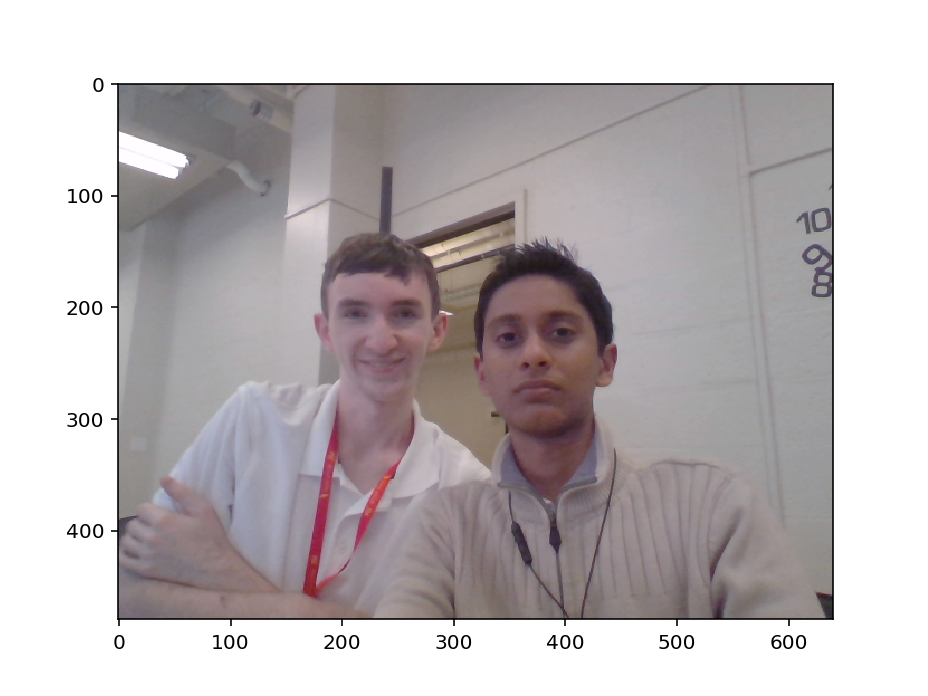

In [75]:
fig,ax = plt.subplots()
pic = take_picture()
ax.imshow(pic)

Hello gorgeous!! Now, let's see if we can detect any faces.

In [76]:
# first, we load the models that dlib has to detect faces.
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

<IPython.core.display.Javascript object>


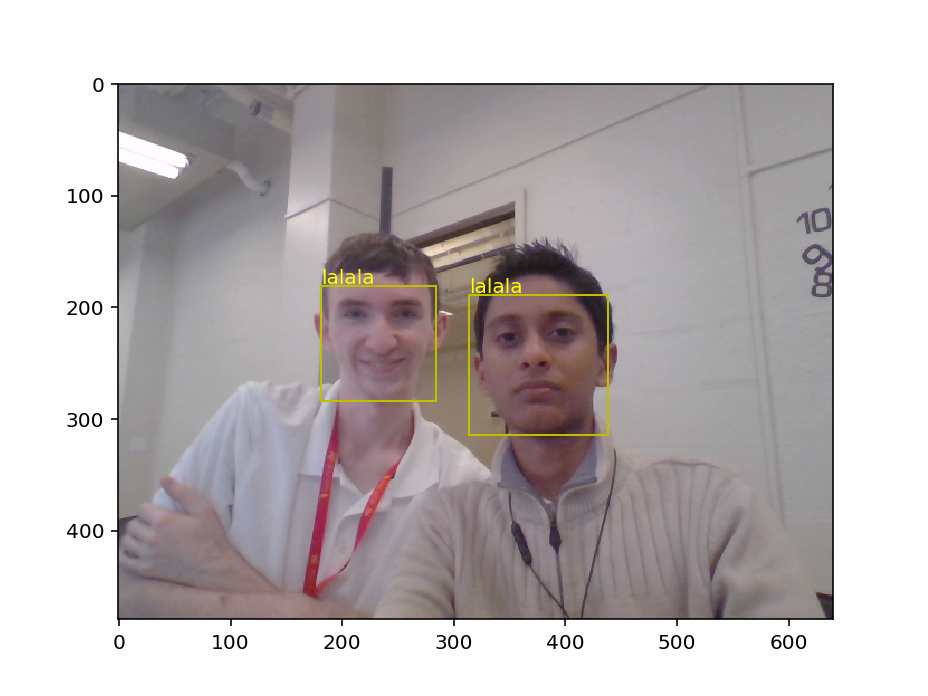

In [77]:

# Create figure and axes
fig,ax = plt.subplots()

# Display the image
ax.imshow(pic)

# Create a Rectangle patch
detection = list(face_detect(pic))
for val in range(len(detection)):
    det = detection[val]

    l, r, t, b = det.left(), det.right(), det.top(), det.bottom()  
    rect = patches.Rectangle((l,t),r-l,b-t,linewidth=1,edgecolor='y',facecolor='none',label='label')
    plt.text(l, t-2,'lalala',color='yellow')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

[rectangle(244,211,394,360)]


Heck yeah, we got a face, which is a step in the right direction. However, in order to match names with faces, we need to be able to distinguish *between* faces. Luckily, dlib has this cool feature called a "face descriptor vector". Think of a face descriptor as a numerical representation of the intricacies of your face. Run the code below to SEE the descriptor vector!

<IPython.core.display.Javascript object>


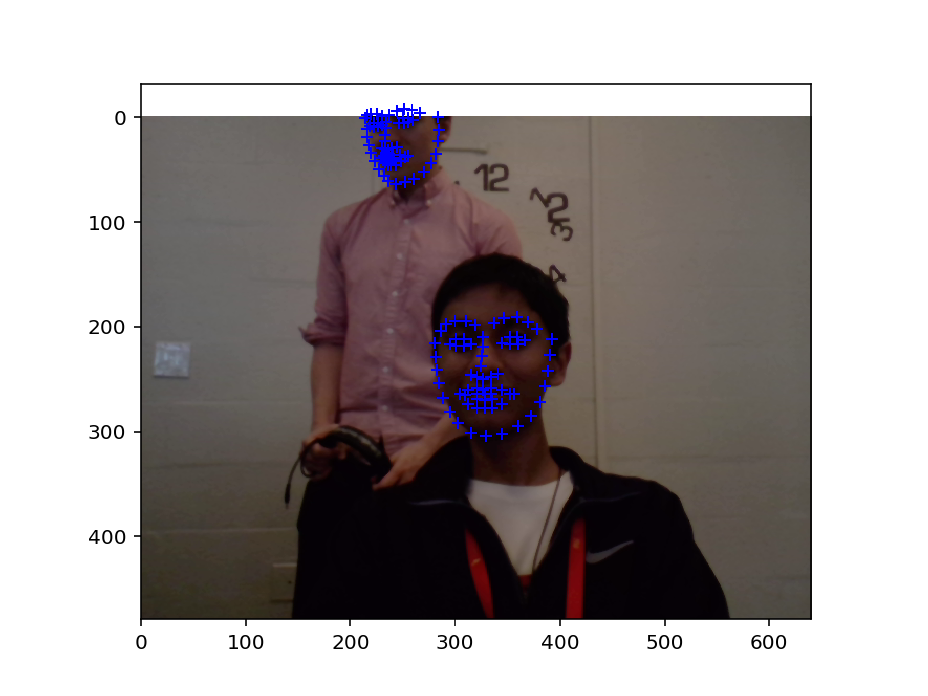

Number of faces detected: 2


In [6]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots()
ax.imshow(pic)


print("Number of faces detected: {}".format(len(detections)))
for k, d in enumerate(detections):
    # Get the landmarks/parts for the face in box d.
    shape = shape_predictor(pic, d)
    # Draw the face landmarks on the screen.
    for i in range(68):
        ax.plot(shape.part(i).x,shape.part(i).y,'+',color="blue")

A little freaky, right? Nevertheless, we can compare the numerical value of these descriptor vectors to see how close the faces are in appearance. To get the descriptor vector of a face, we need to let the model know which face we're talking about and what shape it is. So, we use the shape_predictor model.

In [8]:
# let's take a look as to what the descriptor is!!
shape = shape_predictor(pic, detections[1])
descriptor = np.array(face_rec_model.compute_face_descriptor(pic, shape))
print(descriptor)
print(descriptor.shape)

[-0.03553994  0.10010238  0.03833418 -0.06496698 -0.09306111 -0.01380273
 -0.06439649 -0.0310874   0.07419961 -0.04098098  0.23939741 -0.06736811
 -0.19807783 -0.06614456 -0.08934894  0.05835027 -0.04493084 -0.04417586
 -0.15127732 -0.08270915  0.04818623  0.05676735  0.04253412  0.08412483
 -0.13377281 -0.2417265  -0.05995243 -0.18998714  0.01318458 -0.21155709
 -0.03898345  0.05982234 -0.11639151 -0.05309646 -0.00959216 -0.04605226
 -0.08386203 -0.06379032  0.2802316   0.01762633 -0.11113233  0.02950127
  0.04335057  0.31192979  0.16515864 -0.00246677  0.02052402 -0.05491901
  0.19099329 -0.23303476  0.06932061  0.18854749  0.09960469  0.13053662
  0.10541424 -0.09619017  0.07447121  0.14310193 -0.21248561  0.09178188
  0.01174941 -0.09403155 -0.05608144 -0.1205379   0.17074876  0.10384382
 -0.07650113 -0.11455673  0.12733702 -0.13235006 -0.04969535  0.10921888
 -0.1332235  -0.16074377 -0.19171681  0.05930202  0.2966305   0.23847318
 -0.1787852   0.03763782 -0.10143624 -0.09867027  0

128

In [9]:
np.sqrt(np.sum((descriptor[0]-descriptor[1])**2))

0.13564231619238853

Woah, that's pretty cool!! As you can see, the **descriptor vector** looks like a pretty standard NumPy array. Each descriptor vector is different. Even if we take descriptor vectors of the same face in two different pictures, they'll be slightly different. Now, the problem lies in how we can distinguish between the minute details in faces of the same people and the large differences in other faces. 

There's a pretty tried and true formula for finding this out, and it should look a little familiar. We can calculate the distance between each point in the vector, add it all up, and see if it's greater or less than a certain threshold value that we can determine ourselves.

differences = $\sqrt{\sum{((p1 - p2)^2)}}$

As a note, we square each difference between points to make sure it isn't negative and messing up our total. Then, we square root it all at the end to even it back out.

Alright, now it's your turn! Grab a friend and take a picture. As a note, you'll get two detections, two shapes, and two descriptor values, so remember to account for them both. Try seeing how different your faces are. Then, maybe take two pictures of yourself and see the difference between the two. Try to come up with a good threshold value between determining different people. 

Some other cool things to try: 
- When you printed out your detections, there were four points that had the bounding box of the face. Try to find a way to display the box!
- If the 68-point face descriptor is too freaky for you, there's a much faster *5 point descriptor*. Read about it [here](http://blog.dlib.net/2017/09/fast-multiclass-object-detection-in.html)! 

Have fun!